<a href="https://colab.research.google.com/github/ChirathD/Realtime-digit-recognition-tensorflowjs/blob/master/DigitRecognizer_99.7%25_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 637kB/s 


In [0]:
link= 'https://drive.google.com/open?id=1i7cNCXCEqTjeC1HHQgILWjA0nfjBtya1'

In [0]:
fluff, id = link.split('=')
print (id)

1i7cNCXCEqTjeC1HHQgILWjA0nfjBtya1


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')

In [0]:
df3.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df3.shape

(42000, 785)

In [0]:
link='https://drive.google.com/open?id=1s9oZVd_7MiNSTihU_yOfulanGqWBD8ex'

In [0]:
fluff, id = link.split('=')
print (id)

1s9oZVd_7MiNSTihU_yOfulanGqWBD8ex


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df4 = pd.read_csv('Filename.csv')

In [0]:
df4.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
#Lets separate Labels and Features
Y_train=df3["label"]
#once we drope the labels column we can have our features. actually they are pixels
X_train=df3.drop(labels = ["label"],axis = 1) 

In [0]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
#we dont need df3 anymore. so by deleting df3 we could save some ram
del df3

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


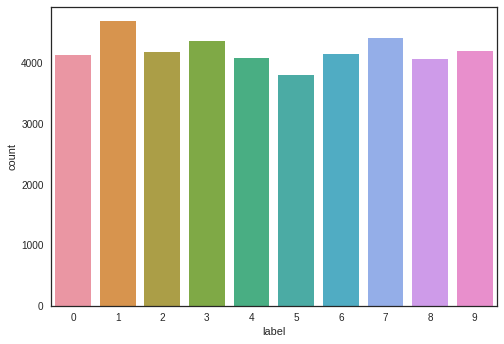

In [0]:
g = sns.countplot(Y_train)

In [0]:
X_train=X_train/255
test=df4/255

In [0]:
#Reshape 1D vector to 28x28 pixels matrix
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
#Label Encoding one hot encoding
Y_train = to_categorical(Y_train, num_classes = 10)


In [0]:
random_seed = 2


In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [0]:
X_train.shape

(37800, 28, 28, 1)

In [0]:
X_val.shape

(4200, 28, 28, 1)

In [0]:
Y_train.shape

(37800, 10)

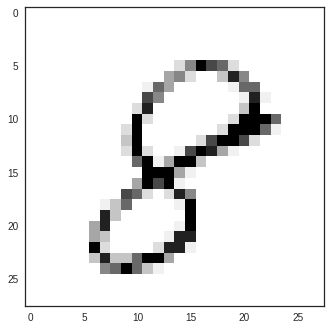

In [0]:
plt.imshow(X_train[0][:,:,0])

In [0]:
#define the model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 30 
batch_size = 86

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [0]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 294s - loss: 0.4584 - acc: 0.8510 - val_loss: 0.0863 - val_acc: 0.9733
Epoch 2/30
 - 293s - loss: 0.1371 - acc: 0.9581 - val_loss: 0.0466 - val_acc: 0.9857
Epoch 3/30
 - 292s - loss: 0.1039 - acc: 0.9692 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 4/30
 - 291s - loss: 0.0872 - acc: 0.9743 - val_loss: 0.0300 - val_acc: 0.9917
Epoch 5/30
 - 290s - loss: 0.0779 - acc: 0.9773 - val_loss: 0.0262 - val_acc: 0.9907
Epoch 6/30
 - 290s - loss: 0.0727 - acc: 0.9790 - val_loss: 0.0422 - val_acc: 0.9886
Epoch 7/30
 - 289s - loss: 0.0670 - acc: 0.9803 - val_loss: 0.0286 - val_acc: 0.9905

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
 - 291s - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0260 - val_acc: 0.9931
Epoch 9/30
 - 288s - loss: 0.0513 - acc: 0.9853 - val_loss: 0.0227 - val_acc: 0.9948
Epoch 10/30
 - 289s - loss: 0.0510 - acc: 0.9849 - val_loss: 0.0286 - val_acc: 0.9933
Epoch 11/30
 - 290s 

In [0]:
pip install tensorflowjs

    100% |████████████████████████████████| 96.1MB 218kB/s 
    100% |████████████████████████████████| 13.9MB 3.3MB/s 
    100% |████████████████████████████████| 61kB 20.8MB/s 
    100% |████████████████████████████████| 3.0MB 9.4MB/s 
    100% |████████████████████████████████| 358kB 17.4MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
model.save('keras.h5')

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

In [0]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 84%)
  adding: model/group1-shard1of1.bin (deflated 7%)


In [0]:
from google.colab import files
files.download('model.zip')

In [0]:
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [0]:
results.shape

(28000,)

In [0]:
results.head()

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64